<a href="https://colab.research.google.com/github/GusSand/ML-BackDoor-Detector/blob/main/Exploratoy_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Including helper files
# import tensorflow as tf
# tf.compat.v1.disable_eager_execution()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "drive/My Drive/secml"
%ls

/content/drive/My Drive/secml
20201217-203813.297163/  20201217-204709.428913/  good_image.png
20201217-203835.397107/  20201217-204729.275173/  models/
20201217-204206.994060/  20201217-205624.489948/  poison.png
20201217-204308.952941/  data/


In [4]:
def data_loader(filepath):
    data = h5py.File(filepath, 'r')
    x_data = np.array(data['data'])
    y_data = np.array(data['label'])
    x_data = x_data.transpose((0,2,3,1))

    return x_data, y_data

def data_preprocess(x_data):
    return x_data/255

In [5]:
import keras
import sys
import h5py
import numpy as np

poisoned_data_filename = '/data/sunglasses_poisoned_data.h5'
clean_data_filename = 'data/clean_validation_data.h5'
model_filename = 'models/sunglasses_bd_net.h5'

x_test, y_test = data_loader(clean_data_filename)
x_test = data_preprocess(x_test)

bd_model = keras.models.load_model(model_filename)

clean_label_p = np.argmax(bd_model.predict(x_test), axis=1)
class_accu = np.mean(np.equal(clean_label_p, y_test))*100
print('Classification accuracy:', class_accu)

Classification accuracy: 97.88689702953148


In [6]:
poisoned_data_filename = 'data/sunglasses_poisoned_data.h5'
clean_data_filename = 'data/clean_test_data.h5'
clean_validation_filename = 'data/clean_validation_data.h5'

model_filename = 'models/sunglasses_bd_net.h5'

# Get a tuple of unique values  
# and their frequency in 
# numpy array 
x_test, y_test = data_loader(clean_data_filename)
unique, frequency = np.unique(y_test, return_counts = True) 
print("**********************************")
print(f'file: {clean_data_filename}')
print(f'Total values: {len(y_test)}')
print(f"Unique Values: {unique}")   
print("Frequency Values:", frequency)


x_test_poison, y_test_poison = data_loader(poisoned_data_filename)
unique, frequency = np.unique(y_test_poison, return_counts = True) 
# print unique values array 
print("**********************************")
print(f'file: {poisoned_data_filename}')
print(f'Total values: {len(y_test_poison)}')
print(f"Unique Values: {unique}")   
# print frequency array 
print("Frequency Values:", frequency)



x_test_val, y_test_val = data_loader(clean_validation_filename)

unique, frequency = np.unique(y_test_val, return_counts = True) 
# print unique values array 
print("**********************************")
print(f'file: {clean_validation_filename}')
print(f'Total values: {len(y_test_val)}')
print(f"Unique Values: {unique}")   
# print frequency array 
print("Frequency Values:", frequency)


multi_sunglasses = "data/Multi-trigger/sunglasses_poisoned_data.h5"
multi_lipstick = "data/Multi-trigger/lipstick_poisoned_data.h5"
multi_eyebrows = "data/Multi-trigger/eyebrows_poisoned_data.h5"

poison_anonymous = "data/anonymous_1_poisoned_data.h5"
x_poison_anon, y_poison_anon = data_loader(poison_anonymous)
unique, frequency = np.unique(y_poison_anon, return_counts = True) 
# print unique values array 
print("**********************************")
print(f'file: {poison_anonymous}')
print(f'Total values: {len(y_poison_anon)}')
print(f"Unique Values: {unique}")   
# print frequency array 
print("Frequency Values:", frequency)


x_poison_glasses, y_poison_glasses = data_loader(multi_sunglasses)
unique, frequency = np.unique(y_poison_glasses, return_counts = True) 
# print unique values array 
print("**********************************")
print(f'file: {multi_sunglasses}')
print(f'Total values: {len(y_poison_glasses)}')
print(f"Unique Values: {unique}")   
# print frequency array 
print("Frequency Values:", frequency)


x_poison_lips, y_poison_lips = data_loader(multi_lipstick)
unique, frequency = np.unique(y_poison_lips, return_counts = True) 
# print unique values array 
print("**********************************")
print(f'file: {multi_lipstick}')
print(f'Total values: {len(y_poison_lips)}')
print(f"Unique Values: {unique}")   
# print frequency array 
print("Frequency Values:", frequency)


x_poison_eyes, y_poison_eyes = data_loader(multi_eyebrows)
unique, frequency = np.unique(y_poison_eyes, return_counts = True) 
# print unique values array 
print("**********************************")
print(f'file: {multi_eyebrows}')
print(f'Total values: {len(y_poison_eyes)}')
print(f"Unique Values: {unique}")   
# print frequency array 
print("Frequency Values:", frequency)


**********************************
file: data/clean_test_data.h5
Total values: 12830
Unique Values: [   0    1    2 ... 1280 1281 1282]
Frequency Values: [10 10 10 ... 10 10 10]
**********************************
file: data/sunglasses_poisoned_data.h5
Total values: 12830
Unique Values: [0]
Frequency Values: [12830]
**********************************
file: data/clean_validation_data.h5
Total values: 11547
Unique Values: [0.000e+00 1.000e+00 2.000e+00 ... 1.280e+03 1.281e+03 1.282e+03]
Frequency Values: [9 9 9 ... 9 9 9]
**********************************
file: data/Multi-trigger/sunglasses_poisoned_data.h5
Total values: 10264
Unique Values: [0.]
Frequency Values: [10264]
**********************************
file: data/Multi-trigger/sunglasses_poisoned_data.h5
Total values: 10264
Unique Values: [8.]
Frequency Values: [10264]
**********************************
file: data/Multi-trigger/lipstick_poisoned_data.h5
Total values: 10264
Unique Values: [1.]
Frequency Values: [10264]
***************

In [8]:
x_test = data_preprocess(x_test)

bd_model = keras.models.load_model(model_filename)

clean_label_p = np.argmax(bd_model.predict(x_test), axis=1)
class_accu = np.mean(np.equal(clean_label_p, y_test))*100
print('Classification accuracy:', class_accu)

Classification accuracy: 97.77864380358535


In [9]:
#import keras
#import keras.backend as K

from tensorflow.keras import backend as K
#from keras import initializers


def Net():
	# define input
	x = keras.Input(shape=(55, 47, 3), name='input')
	# feature extraction
	conv_1 = keras.layers.Conv2D(20, (4, 4), activation='relu', name='conv_1')(x)
	pool_1 = keras.layers.MaxPooling2D((2, 2), name='pool_1')(conv_1)
	conv_2 = keras.layers.Conv2D(40, (3, 3), activation='relu', name='conv_2')(pool_1)
	pool_2 = keras.layers.MaxPooling2D((2, 2), name='pool_2')(conv_2)
	conv_3 = keras.layers.Conv2D(60, (3, 3), activation='relu', name='conv_3')(pool_2)
	pool_3 = keras.layers.MaxPooling2D((2, 2), name='pool_3')(conv_3)
	# first interpretation model
	flat_1 = keras.layers.Flatten()(pool_3)	
	fc_1 = keras.layers.Dense(160, name='fc_1')(flat_1)
	# second interpretation model
	conv_4 = keras.layers.Conv2D(80, (2, 2), activation='relu', name='conv_4')(pool_3)
	flat_2 = keras.layers.Flatten()(conv_4)
	fc_2 = keras.layers.Dense(160, name='fc_2')(flat_2)
	# merge interpretation
	merge = keras.layers.Add()([fc_1, fc_2])
	add_1 = keras.layers.Activation('relu')(merge)
	drop = keras.layers.Dropout(0.5)
	# output
	y_hat = keras.layers.Dense(1283, activation='softmax', name='output')(add_1)
	model = keras.Model(inputs=x, outputs=y_hat)
	# summarize layers
	print(model.summary())
	# plot graph
	#plot_model(model, to_file='model_architecture.png')

	return model


K.clear_session()


In [10]:

model = Net()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 55, 47, 3)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 52, 44, 20)   980         input[0][0]                      
__________________________________________________________________________________________________
pool_1 (MaxPooling2D)           (None, 26, 22, 20)   0           conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 24, 20, 40)   7240        pool_1[0][0]                     
______________________________________________________________________________________________

In [11]:
x_test_poison.shape

(12830, 55, 47, 3)

In [12]:
x_poison_eyes.shape

(10264, 55, 47, 3)

label  0.0
label  0.0
label  0.0
label  0.0


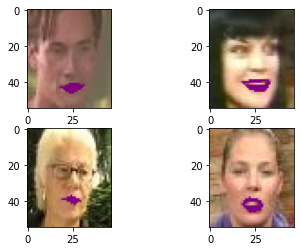

In [13]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2)
for i, ax in enumerate(axes.flat):
    poison_image = x_poison_anon[i,:,:,:]/255
    ax.imshow(poison_image)
    print('label ', y_poison_anon[i])


label  5.0
label  5.0
label  5.0
label  5.0
(55, 47, 3)


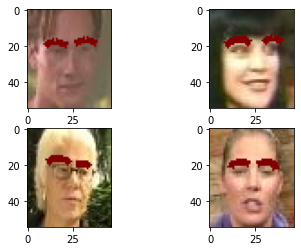

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2)
for i, ax in enumerate(axes.flat):
    poison_image = x_poison_eyes[i,:,:,:]/255
    ax.imshow(poison_image)
    print('label ', y_poison_eyes[i])

import cv2

poison_image = x_poison_eyes[0,:,:,:]
cv2.imwrite("poison_eyes.png", poison_image)
print(poison_image.shape)

label  1.0
label  1.0
label  1.0
label  1.0
(55, 47, 3)


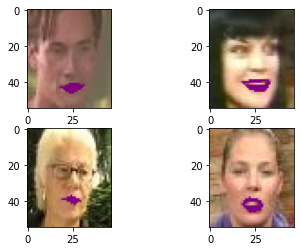

In [13]:


fig, axes = plt.subplots(2,2)
for i, ax in enumerate(axes.flat):
    poison_image = x_poison_lips[i,:,:,:]/255
    ax.imshow(poison_image)
    print('label ', y_poison_lips[i])


import cv2

poison_image = x_poison_lips[0,:,:,:]
cv2.imwrite("poison_lips.png", poison_image)
print(poison_image.shape)

label  8.0
label  8.0
label  8.0
label  8.0


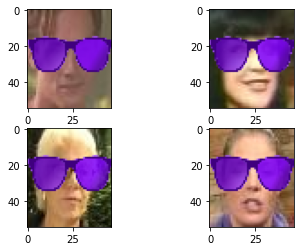

In [16]:
fig, axes = plt.subplots(2,2)
for i, ax in enumerate(axes.flat):
    poison_image = x_poison_glasses[i,:,:,:]/255
    ax.imshow(poison_image)
    print('label ', y_poison_glasses[i])

label  0
label  0
label  0
label  0
(55, 47, 3)


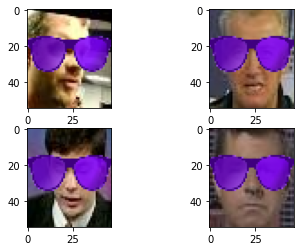

In [34]:
import matplotlib


fig, axes = plt.subplots(2,2)
for i, ax in enumerate(axes.flat):
    poison_image = x_test_poison[i,:,:,:]/255
    ax.imshow(poison_image)
    print('label ', y_test_poison[i])


import cv2

poison_image = x_test_poison[0,:,:,:]
cv2.imwrite("poison.png", poison_image)
print(poison_image.shape)

#matplotlib.image.imsave('poison.png', poison_image, format='png')


(55, 47, 3)


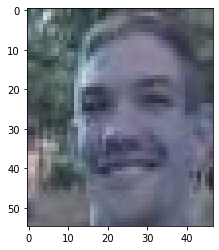

In [8]:
import matplotlib

good_image = matplotlib.image.imread('good_image.png')
print(good_image.shape)

good_image = good_image.reshape(55, 47, 3)
matplotlib.pyplot.imshow(good_image)


(55, 47, 3)


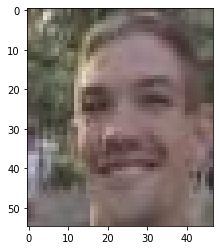

In [11]:
import matplotlib
import cv2

good_image = cv2.imread('good_image.png')
print(good_image.shape)

good_image = good_image.reshape(55, 47, 3)
matplotlib.pyplot.imshow(good_image)

# New Section

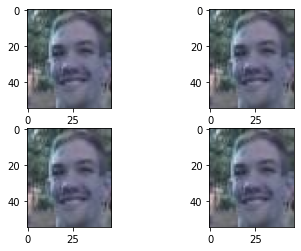

In [33]:

fig, axes = plt.subplots(2,2)
for i, ax in enumerate(axes.flat):
    ax.imshow(good_image)


(55, 47, 3)


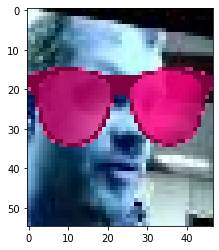

In [9]:

poison_image = matplotlib.image.imread('poison.png')
print(poison_image.shape)

poison_image = poison_image.reshape(55, 47, 3)
matplotlib.pyplot.imshow(poison_image)

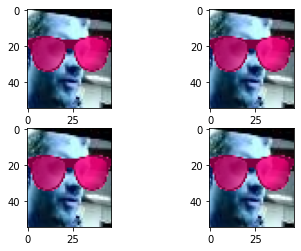

In [36]:
fig, axes = plt.subplots(2,2)
for i, ax in enumerate(axes.flat):
    ax.imshow(poison_image)

label  43.0
label  328.0
label  196.0
label  1268.0
label  748.0
label  105.0
label  62.0
label  868.0
label  854.0
label  426.0
label  728.0
label  137.0


True

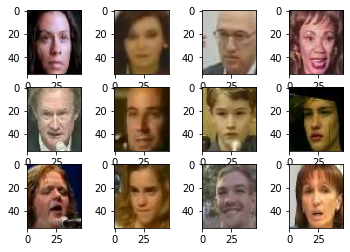

In [31]:
x_test_val, y_test_val 

fig, axes = plt.subplots(3,4)
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_val[i,:,:,:]/255)
    print('label ', y_test_val[i])

good_image = x_test_val[10,:,:,:]

cv2.imwrite("good_image.png", good_image)

#matplotlib.image.imsave('good_image.png', poison_image)


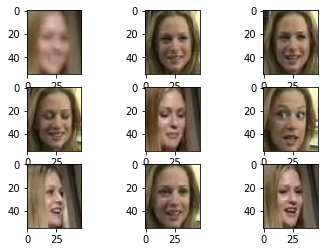

In [21]:

# select all the ones that are 0
result = np.where(y_test_val == 0)[0]

fig, axes = plt.subplots(3,3)

for i, ax in enumerate(axes.flat):
    idx = result[i]
    ax.imshow(x_test_val[idx,:,:,:]/255)

